In [ ]:
#importing all the required librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset and reading csv
df= pd.read_csv('winequalityN.csv')

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(6497, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


outliers are
# residual sugar
# free sulfur dioxide
# total sulfur dioxide

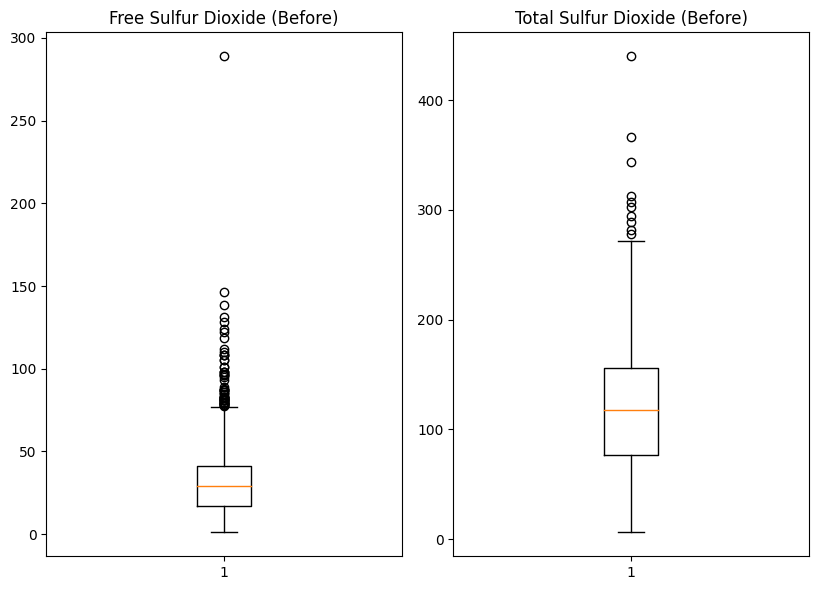

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(132)
plt.boxplot(df['free sulfur dioxide'])
plt.title('Free Sulfur Dioxide (Before)')

plt.subplot(133)
plt.boxplot(df['total sulfur dioxide'])
plt.title('Total Sulfur Dioxide (Before)')

plt.tight_layout()

plt.show()

In [ ]:
df.isnull().sum( )

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

 We can drop null values but **in future** we may require those fields which may* correlated* to model predictions so we **use mean,median**

In [ ]:
#Replacing null values in fixed acidity with median
df['fixed acidity'].fillna(df['fixed acidity'].median(), inplace=True)
df['fixed acidity'].isna().sum()

0

In [ ]:
#Replacing null values in volatile acidity with mean
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['volatile acidity'].isna().sum()

0

In [ ]:
#Replacing null values in citric acid with mean
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['citric acid'].isna().sum()

0

In [ ]:
#Replacing null values in residual sugar with mean
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['residual sugar'].isna().sum()

0

In [ ]:
#Replacing null values in chlorides with median
df['chlorides'].fillna(df['chlorides'].median(), inplace=True)
df['chlorides'].isna().sum()

0

In [ ]:
#Replacing null values in pH with mean
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['pH'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Name: pH, Length: 6497, dtype: bool>

In [ ]:
#Replacing null values in sulphates with median
df['sulphates'].fillna(df['sulphates'].median(), inplace=True)
df['sulphates'].isna().sum()

0

In [ ]:
df.isnull().sum( )

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.isnull().values.any()

False

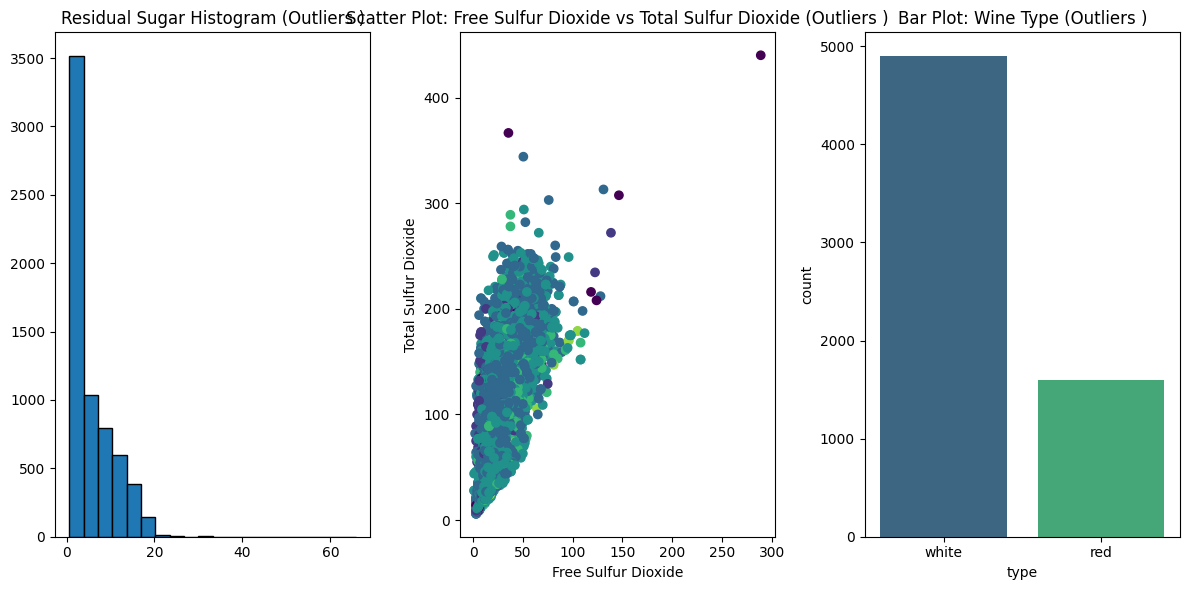

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


#A histogram for 'residual sugar'
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(df['residual sugar'], bins=20, edgecolor='k')
plt.title('Residual Sugar Histogram (Outliers )')

#a scatter plot for 'free sulfur dioxide' vs 'total sulfur dioxide'
plt.subplot(132)
plt.scatter(df['free sulfur dioxide'], df['total sulfur dioxide'], c=df["quality"], cmap='viridis')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Scatter Plot: Free Sulfur Dioxide vs Total Sulfur Dioxide (Outliers )')

# Create bar plots for 'type' and 'quality'
plt.subplot(133)
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Bar Plot: Wine Type (Outliers )')

plt.tight_layout()
plt.show()


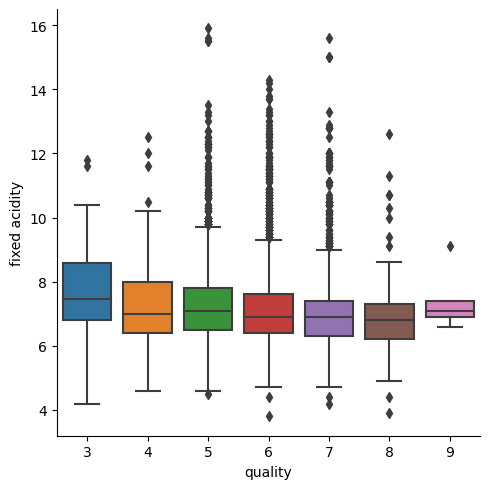

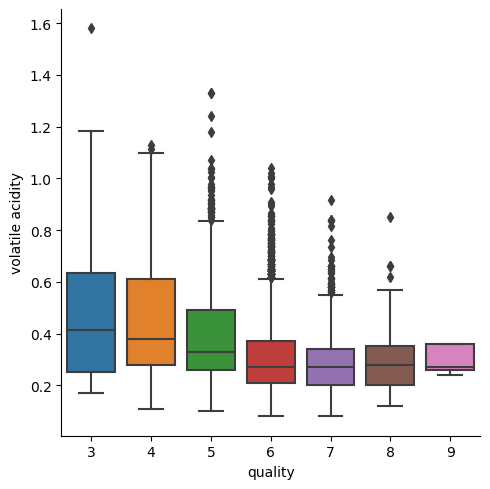

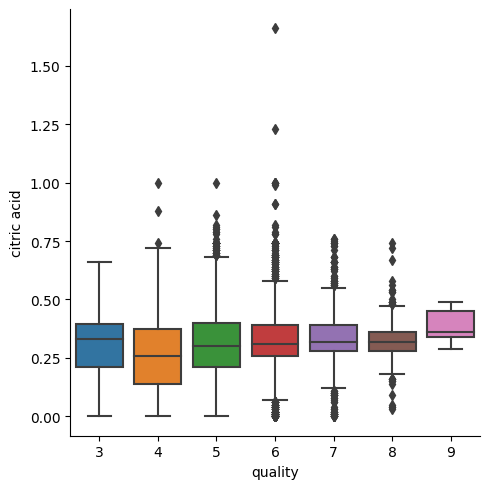

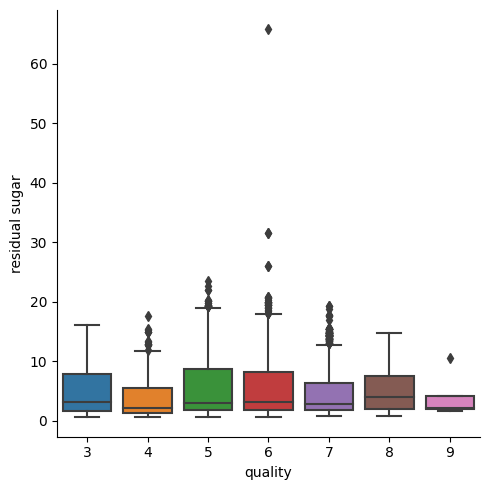

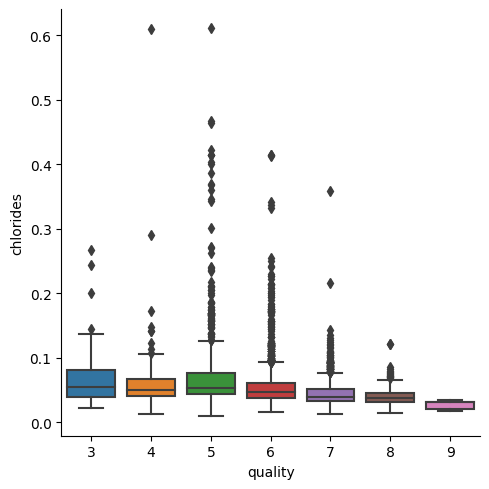

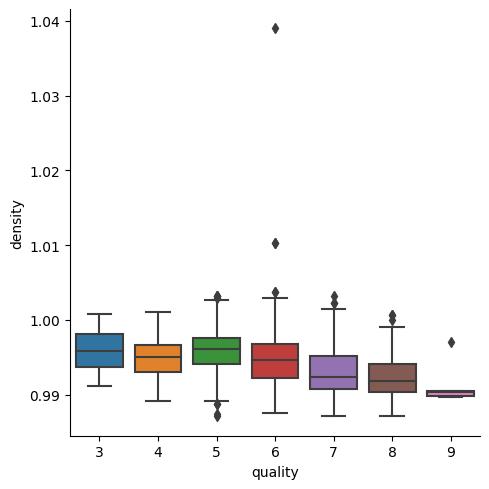

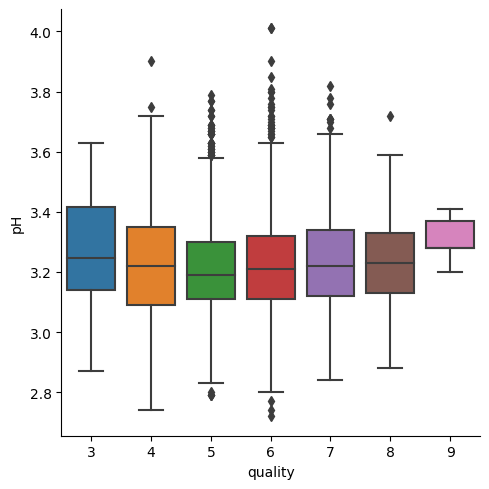

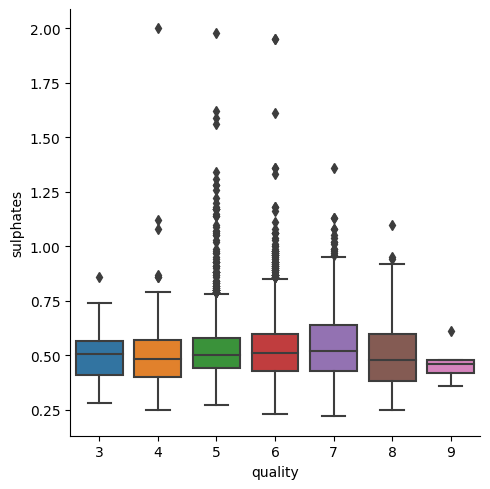

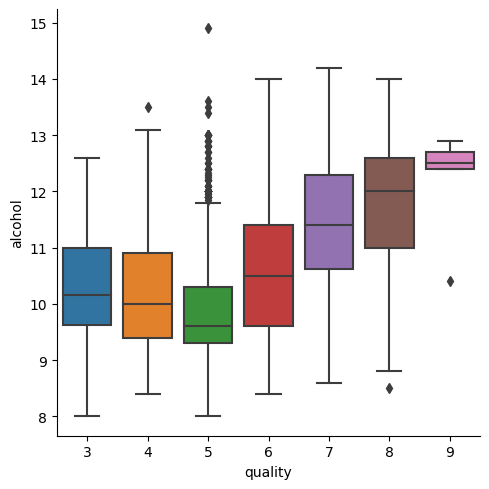

In [ ]:
sns.catplot(x="quality", y="fixed acidity", data=df, kind="box")
sns.catplot(x="quality", y="volatile acidity", data=df, kind="box")
sns.catplot(x="quality", y="citric acid", data=df, kind="box")
sns.catplot(x="quality", y="residual sugar", data=df, kind="box")
sns.catplot(x="quality", y="chlorides", data=df, kind="box")
sns.catplot(x="quality", y="density", data=df, kind="box")
sns.catplot(x="quality", y="pH", data=df, kind="box")
sns.catplot(x="quality", y="sulphates", data=df, kind="box")
sns.catplot(x="quality", y="alcohol", data=df, kind="box")

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219790,0.323485,-0.112250,0.298249,-0.283164,-0.329421,0.458943,-0.251766,0.300198,-0.095561,-0.076931
volatile acidity,0.219790,1.000000,-0.377759,-0.196578,0.377125,-0.353055,-0.414706,0.271107,0.260283,0.225235,-0.038215,-0.265838
citric acid,0.323485,-0.377759,1.000000,0.142451,0.039248,0.133426,0.195148,0.096307,-0.328354,0.057673,-0.010431,0.085699
residual sugar,-0.112250,-0.196578,0.142451,1.000000,-0.128946,0.403242,0.495704,0.552487,-0.266717,-0.185692,-0.359656,-0.036819
chlorides,0.298249,0.377125,0.039248,-0.128946,1.000000,-0.194973,-0.279565,0.362590,0.044879,0.395158,-0.256862,-0.200742
free sulfur dioxide,-0.283164,-0.353055,0.133426,0.403242,-0.194973,1.000000,0.720934,0.025717,-0.145116,-0.188470,-0.179838,0.055463
total sulfur dioxide,-0.329421,-0.414706,0.195148,0.495704,-0.279565,0.720934,1.000000,0.032395,-0.237523,-0.275256,-0.265740,-0.041385
density,0.458943,0.271107,0.096307,0.552487,0.362590,0.025717,0.032395,1.000000,0.011913,0.259414,-0.686745,-0.305858
pH,-0.251766,0.260283,-0.328354,-0.266717,0.044879,-0.145116,-0.237523,0.011913,1.000000,0.190964,0.120939,0.019356
sulphates,0.300198,0.225235,0.057673,-0.185692,0.395158,-0.188470,-0.275256,0.259414,0.190964,1.000000,-0.003261,0.038770


In [ ]:
def makeplot(df,colors):
    for feature in df.columns:
        fig=px.box(df,y=feature,title="<b>"+feature,color=colors,boxmode="group",
                  template="plotly_dark",points="all")
        fig.update_layout(title_x=0.5,title_font_size=30,font_size=15,font_color="aqua")
        fig.show()

In [ ]:
makeplot(df,df["quality"])

In [ ]:
#Removing outliers in residual sugar
lower = df['residual sugar'].mean()-3*df['residual sugar'].std()
upper = df['residual sugar'].mean()+3*df['residual sugar'].std()
df = df[(df['residual sugar']>lower) & (df['residual sugar']<upper)]

#Removing outliers in free sulfur dioxide
lower = df['free sulfur dioxide'].mean()-3*df['free sulfur dioxide'].std()
upper = df['free sulfur dioxide'].mean()+3*df['free sulfur dioxide'].std()
df = df[(df['free sulfur dioxide']>lower) & (df['free sulfur dioxide']<upper)]

#Removing outliers in total sulfur dioxide
lower = df['total sulfur dioxide'].mean()-3*df['total sulfur dioxide'].std()
upper = df['total sulfur dioxide'].mean()+3*df['total sulfur dioxide'].std()
df = df[(df['total sulfur dioxide']>lower) & (df['total sulfur dioxide']<upper)]

In [ ]:
dummies = pd.get_dummies(df['type'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop('type', axis=1, inplace=True)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
count,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000
mean,7.220226,0.340231,0.318550,5.364726,0.056114,30.041291,114.909487,0.994669,3.219071,0.531565,10.495914,5.820995,0.751477
std,1.298793,0.164884,0.144877,4.588666,0.035171,16.619088,55.840907,0.002923,0.160486,0.148808,1.192011,0.870076,0.432190
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992320,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.410000,0.390000,8.000000,0.065000,41.000000,155.000000,0.996927,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,19.600000,0.611000,83.000000,282.000000,1.003690,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
corr=df.corr()

In [ ]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
fixed acidity,1.000000,0.218255,0.324128,-0.116730,0.298735,-0.291882,-0.334312,0.472197,-0.251942,0.302811,-0.097376,-0.076113,-0.487309
volatile acidity,0.218255,1.000000,-0.383308,-0.210471,0.377604,-0.364126,-0.418742,0.271766,0.261415,0.226702,-0.040892,-0.268237,-0.654117
citric acid,0.324128,-0.383308,1.000000,0.141193,0.039903,0.150836,0.196909,0.094774,-0.330207,0.057526,-0.015040,0.085146,0.189081
residual sugar,-0.116730,-0.210471,0.141193,1.000000,-0.134400,0.442246,0.509748,0.525926,-0.266824,-0.184795,-0.367276,-0.034764,0.354639
chlorides,0.298735,0.377604,0.039903,-0.134400,1.000000,-0.201236,-0.281981,0.373174,0.044427,0.397295,-0.258898,-0.202474,-0.513067
free sulfur dioxide,-0.291882,-0.364126,0.150836,0.442246,-0.201236,1.000000,0.729294,0.031023,-0.154769,-0.201343,-0.185448,0.078145,0.490710
total sulfur dioxide,-0.334312,-0.418742,0.196909,0.509748,-0.281981,0.729294,1.000000,0.024340,-0.238709,-0.280043,-0.266838,-0.031010,0.706462
density,0.472197,0.271766,0.094774,0.525926,0.373174,0.031023,0.024340,1.000000,0.018118,0.273885,-0.703323,-0.313566,-0.409345
pH,-0.251942,0.261415,-0.330207,-0.266824,0.044427,-0.154769,-0.238709,0.018118,1.000000,0.187523,0.119069,0.018739,-0.329212
sulphates,0.302811,0.226702,0.057526,-0.184795,0.397295,-0.201343,-0.280043,0.273885,0.187523,1.000000,-0.007619,0.034828,-0.488597


In [ ]:
import plotly.express as px
import pandas as pd


# Selecting important features based on correlation values
important_features = ['alcohol', 'citric acid', 'sulphates', 'volatile acidity', 'chlorides', 'white']

# Creating scatter plots for each important feature vs. quality
for feature in important_features:
    fig = px.scatter(df, x=feature, y='quality', trendline="ols", title=f"{feature.capitalize()} vs. Quality")
    fig.show()


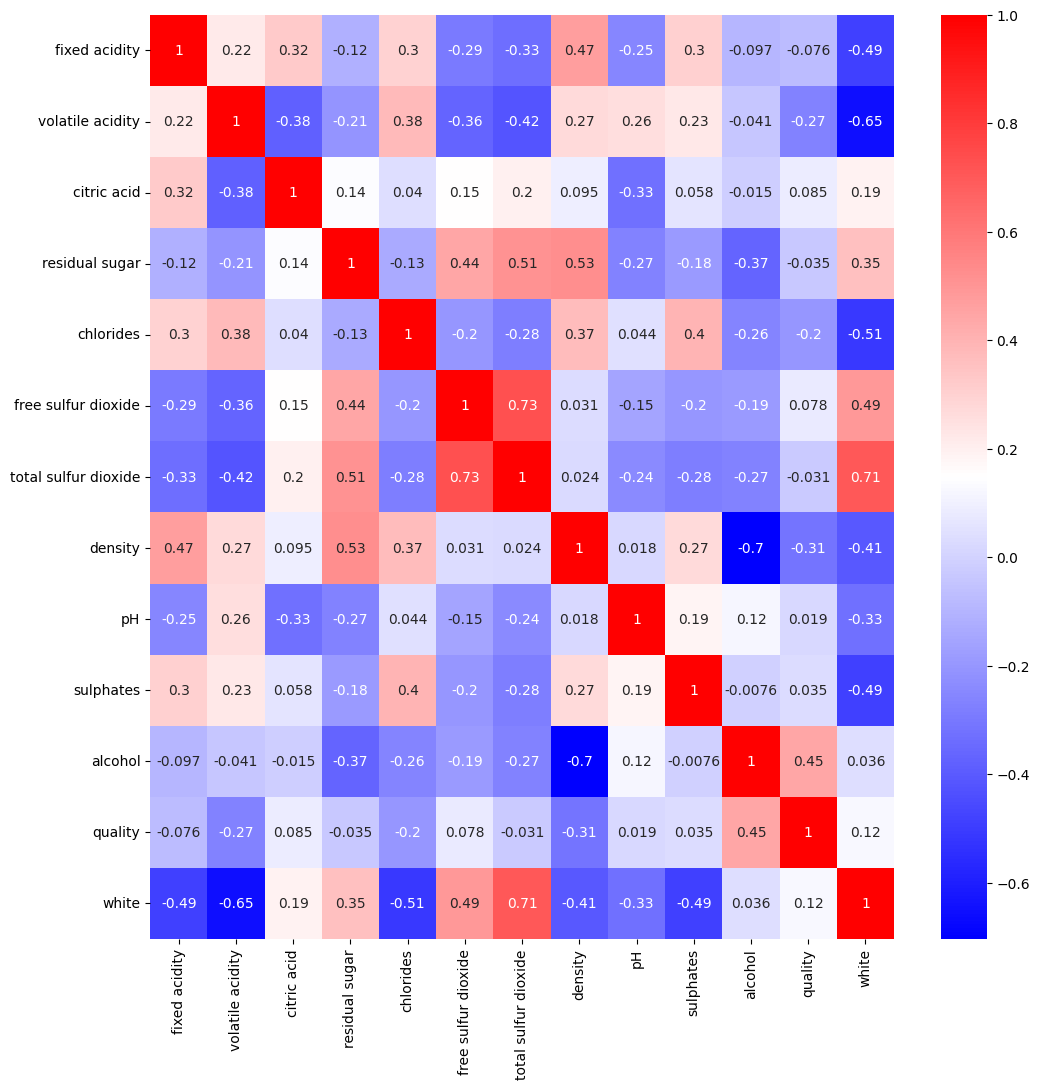

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True,cmap="bwr")
plt.show()

# alcohol has the highest positive correlation with quality (0.445601), followed by citric acid (0.085146) and sulphates (0.034828). On the other hand, volatile acidity (-0.268237), chlorides (-0.202474), and white (-0.488597) have the highest negative correlations with quality.

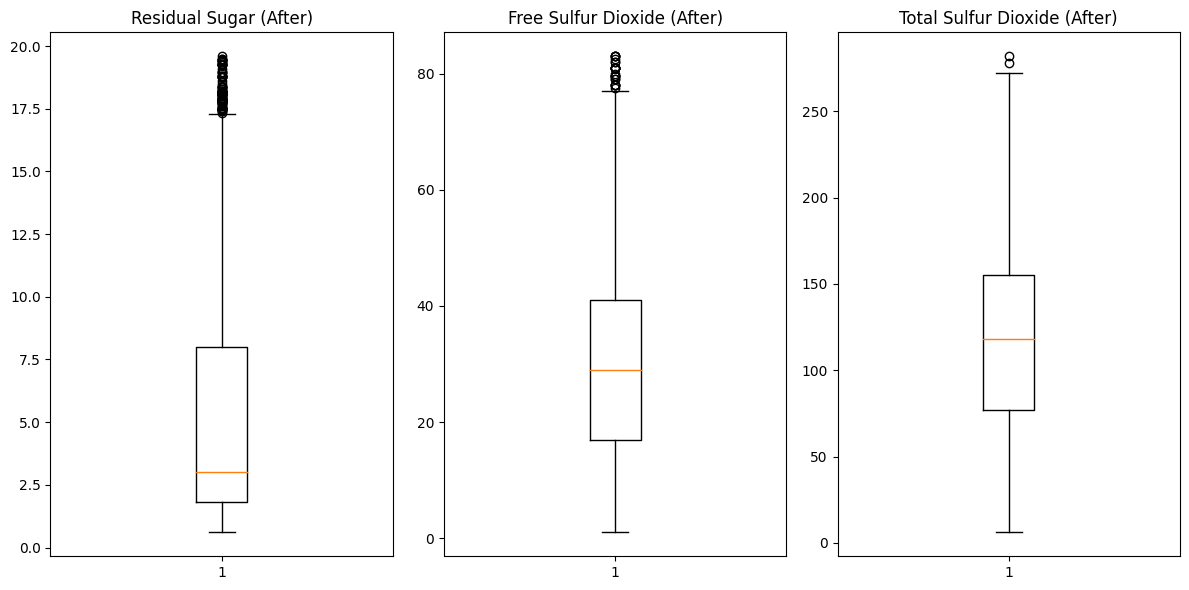

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd




# Now, create box plots after removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.boxplot(df['residual sugar'])
plt.title('Residual Sugar (After)')

plt.subplot(132)
plt.boxplot(df['free sulfur dioxide'])
plt.title('Free Sulfur Dioxide (After)')

plt.subplot(133)
plt.boxplot(df['total sulfur dioxide'])
plt.title('Total Sulfur Dioxide (After)')

plt.tight_layout()

plt.show()


Text(0.5, 1.0, 'Scatter Plot: Free Sulfur Dioxide vs Total Sulfur Dioxide (Outliers Removed)')

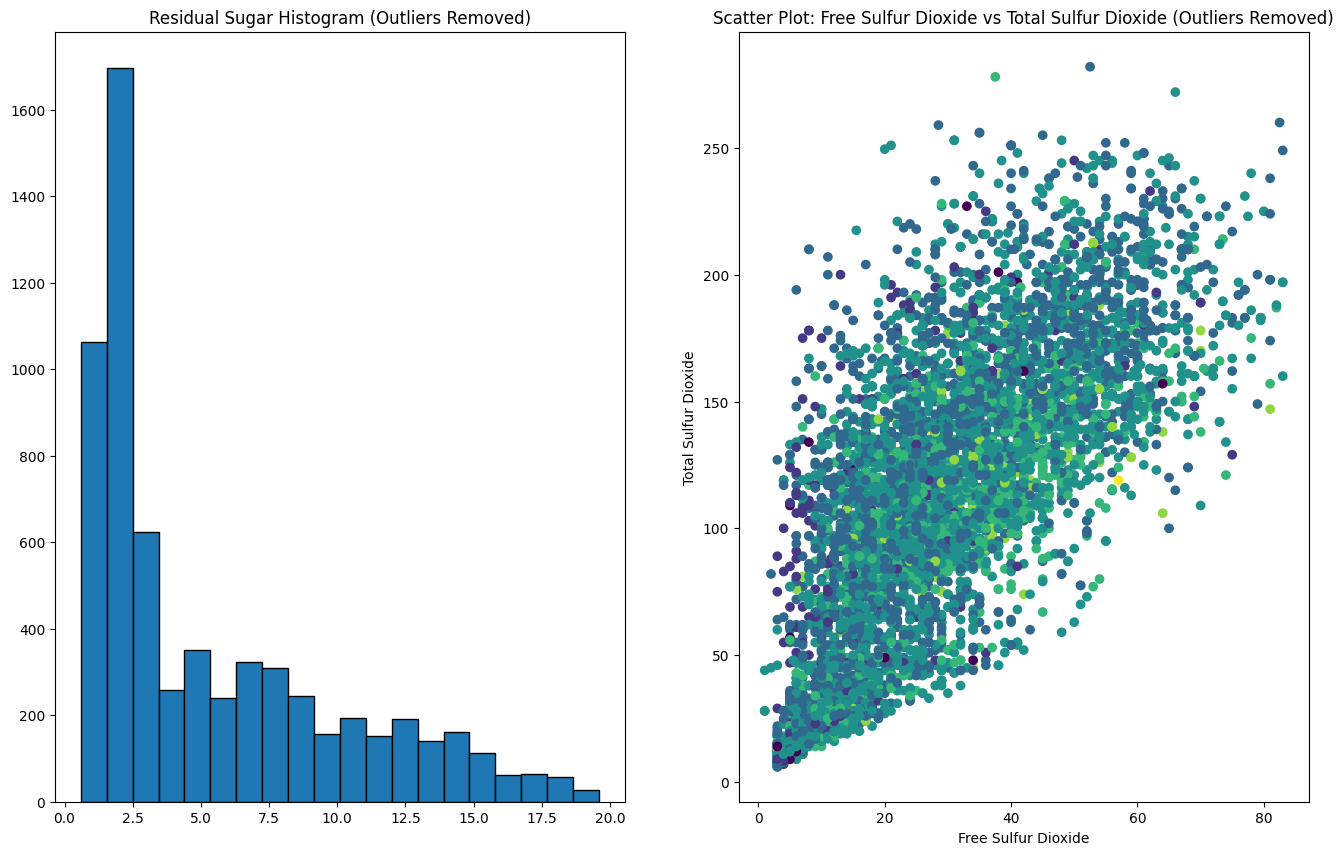

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a histogram for 'residual sugar'
plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.hist(df['residual sugar'], bins=20, edgecolor='k')
plt.title('Residual Sugar Histogram (Outliers Removed)')

# Create a scatter plot for 'free sulfur dioxide' vs 'total sulfur dioxide'
plt.subplot(132)
plt.scatter(df['free sulfur dioxide'], df['total sulfur dioxide'], c=df["quality"], cmap='viridis')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Scatter Plot: Free Sulfur Dioxide vs Total Sulfur Dioxide (Outliers Removed)')




In [ ]:
import plotly.express as px

def makeplot(df, colors):
    for feature in df.columns:
        fig = px.box(df, y=feature, title="<b>" + feature, color=colors, boxmode="group",
                     template="plotly_dark", points="all")
        fig.update_layout(title_x=0.5, title_font_size=30, font_size=15, font_color="aqua")
        fig.show()

makeplot(df, df["quality"])


In [ ]:

fig = px.scatter(df, x="fixed acidity", y="citric acid", color="quality", title="Scatter Plot of Fixed Acidity vs. Citric Acid by Quality")
fig.show()


train

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6430 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6430 non-null   float64
 1   volatile acidity      6430 non-null   float64
 2   citric acid           6430 non-null   float64
 3   residual sugar        6430 non-null   float64
 4   chlorides             6430 non-null   float64
 5   free sulfur dioxide   6430 non-null   float64
 6   total sulfur dioxide  6430 non-null   float64
 7   density               6430 non-null   float64
 8   pH                    6430 non-null   float64
 9   sulphates             6430 non-null   float64
 10  alcohol               6430 non-null   float64
 11  quality               6430 non-null   int64  
 12  white                 6430 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 659.3 KB


In [ ]:
# Define the features (X) and the target (y)
X = df.drop('quality', axis=1)  # Drop the 'quality' column as it is the target variable
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0


In [ ]:
# Import various classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a list of classification models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Classifier', SVC(random_state=42))
]

# Iterate through the models and evaluate their performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(matrix)
    print('-------------------------------------------')


Model: Random Forest
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.80      0.12      0.22        32
           5       0.73      0.76      0.74       429
           6       0.67      0.79      0.72       555
           7       0.77      0.55      0.64       227
           8       0.87      0.36      0.51        36
           9       0.00      0.00      0.00         2

    accuracy                           0.70      1286
   macro avg       0.55      0.37      0.40      1286
weighted avg       0.71      0.70      0.69      1286

Confusion Matrix:
[[  0   0   2   3   0   0   0]
 [  0   4  22   6   0   0   0]
 [  0   1 324 101   3   0   0]
 [  0   0  95 439  21   0   0]
 [  0   0   3  97 125   2   0]
 [  0   0   0   9  14  13   0]
 [  0   0   0   2   0   0   0]]
-------------------------------------------
Model: Decision Tree
Accuracy: 0.61
Classification Report:
     

In [45]:
import numpy as np

# Function to convert confusion matrix to 3x3 matrix
def convert_to_3x3(matrix):
    return np.array([matrix[i][:3] for i in range(3)])

# Iterate through the models and evaluate their performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    # Convert confusion matrix to 3x3
    converted_matrix = convert_to_3x3(matrix)

    print('Converted 3x3 Confusion Matrix:')
    print(converted_matrix)

    print('-------------------------------------------')


Model: Random Forest
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.80      0.12      0.22        32
           5       0.73      0.76      0.74       429
           6       0.67      0.79      0.72       555
           7       0.77      0.55      0.64       227
           8       0.87      0.36      0.51        36
           9       0.00      0.00      0.00         2

    accuracy                           0.70      1286
   macro avg       0.55      0.37      0.40      1286
weighted avg       0.71      0.70      0.69      1286

Converted 3x3 Confusion Matrix:
[[  0   0   2]
 [  0   4  22]
 [  0   1 324]]
-------------------------------------------
Model: Decision Tree
Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.27      0.22      0.24        32


**Random Forest:**
Accuracy: 70%
Strengths: Good performance overall, especially in predicting classes 5 6 and 7.
Weaknesses: Struggles with classes 3, 4, and 8.

**Decision Tree:**
Accuracy: 61%
Similar to Random Forest, but slightly lower accuracy.
Strengths: Performs well in predicting class 5.
Weaknesses: Struggles with classes 3, 4, and 8.


**Logistic Regression:**
Accuracy: 48%
Weak performance overall.
Strengths: Better at predicting class 5 compared to other models.
Weaknesses: Poor performance in predicting other classes.

**Support Vector Classifier:**
Accuracy: 43%
Weakest performance among the models.
Struggles to predict all classes, especially classes 3, 4, 5, and 7.

**Conclusion:**
The Random Forest model outperforms the other models with the highest accuracy (70%).
Decision Tree and Logistic Regression show moderate performance.
Support Vector Classifier performs the worst among the models.